# Bibliothèques


In [76]:
import numpy as np
import matplotlib
from matplotlib import transforms, pyplot as plt

In [77]:
# define colors
GRAY1 = '#231F20'
GRAY3 = '#555655'
GRAY7 = '#929497'
GRAY8 =  '#A6A6A5'
BLUE2 =  '#4A81BF'
BLUE3, BLUE4 = '#94B2D7', '#94AFC5'
ORANGE1 = '#F79747'

# Alternative 1. Utilisation directe des chiffres

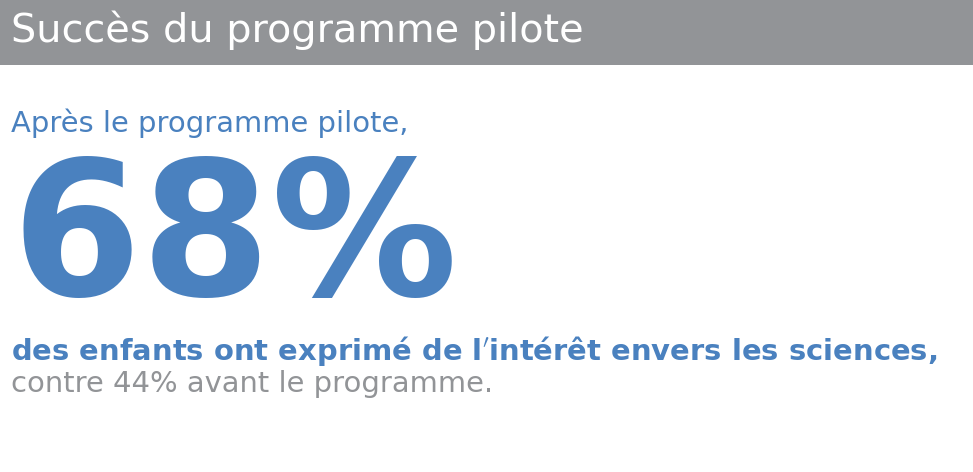

In [120]:
# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines 
plt.tick_params(bottom='off', left='off', labelleft='off', labelbottom='off')

# titile the plot
plt.text(-0.15, 1.03,
         'Succès du programme pilote'+' '*30,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7, 'pad': 10, 'edgecolor': 'none'})

plt.axis('off')
# add note to the plot
plt.text(-0.15, 0.81,
         'Après le programme pilote,',
         fontsize=19,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.41,
         '$\\bf{68\%}$', # use mathtext \\bf for bold text
         fontsize=122,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.25,
         # use mathtext \\bf for bold text
         '$\\bf{des\ enfants\ ont\ exprimé\ de\ l\'intérêt\ envers\ les\ sciences,}$',
         fontsize=19,
         color=BLUE2)

# add note to the plot
plt.text(-0.15, 0.17,
         'contre 44% avant le programme.',
         fontsize=19,
         color=GRAY7)

plt.show()

# Alternative 2. Le diagramme en bâtons classique

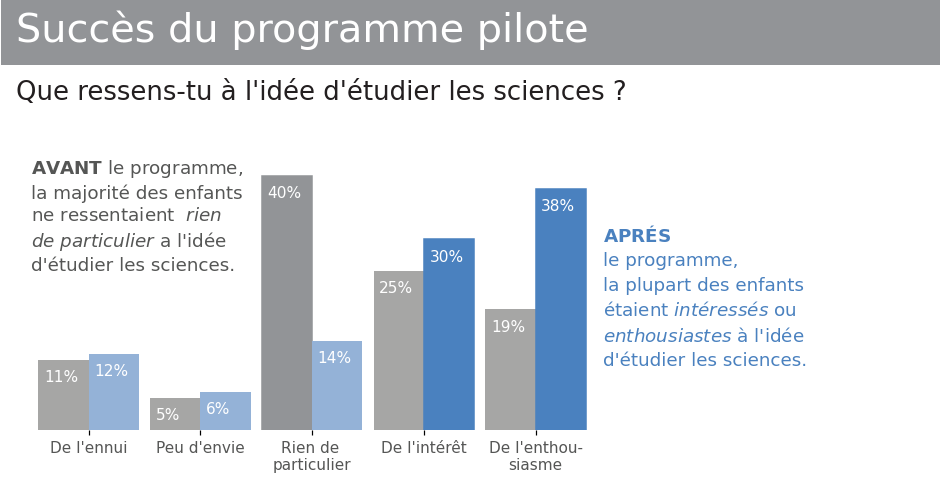

In [144]:
# survey responses
X = ['De l\'ennui','Peu d\'envie','Rien de \nparticulier', 'De l\'intérêt', 'De l\'enthou-\nsiasme']

Y = [11, 5, 40, 25, 19] # responses distribution before the program
Z = [12, 6, 14, 30, 38] # responses distribution after the program

# create new figure
plt.figure(figsize=(7.45, 4.9), # width, height in inches
           dpi=110)             # resolution of the figure

# tune the subplot layout by setting sides of the figure
plt.subplots_adjust(left=0, right=0.735, top=0.665, bottom=0.17)

# There is no automatic support of subcategories bar plot in matplotlib.
def subcategorybar(X,  # categories names
                   vals,  # subcategories values
                   base_colors,  # base colors for each subcategory
                   special_colors,  # highlight colors for subcategories
                   special_bars,  # highlighted bars indicies 
                   width=0.9):  # total subcategories bars width
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        # draw i-th subcategory bars
        bars = plt.bar(_X - width / 2. + i / float(n) * width,
                       vals[i],
                       width=width / float(n),
                       align="edge",  # aligns bars by their left edges
                       color=base_colors[i])  # use base color for subcategory

        # add numerical data labels for each bar
        for bi, b in enumerate(bars):
            plt.text(b.get_x() + 0.05, b.get_height() - 3.5,
                     str(vals[i][bi]) + '%',
                     fontsize=10,
                     color='white')
        # highlight bars
        if special_bars[i] != None:
            for special_bar_i in special_bars[i]:
                bars[special_bar_i].set_color(special_colors[i])
    # set category tick locations and labels of the x-axis
    plt.xticks(_X, X)


# draw subcategorical vertical bar plot
subcategorybar(X,  # responses
               [Y, Z],  # pre- and post- responses distribution
               [GRAY8, BLUE3],  # colors for pre- and post- bars
               [GRAY7, BLUE2],  # highlight colors for pre- and post- bars
               [[2], [3, 4]])  # highlight 3rd pre- and 4th,5th post- bar

# remove chart border
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# change the appearance of ticks, tick labels, and gridlines
plt.tick_params(bottom='off', left='off', labelleft='off')

# configure responses labels appearance
for item in plt.gca().get_xticklabels():
    item.set_fontsize(10)
    item.set_color(GRAY3)

# titile the plot
plt.text(-0.65, 61,
         'Succès du programme pilote' + ' ' * 27,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

# add survey question
plt.text(-0.65, 52, 'Que ressens-tu à l\'idée d\'étudier les sciences ?', fontsize=17, 
         color=GRAY1)


# add pre- note to plot
plt.text(-0.52, 25,
         '$\\bf{AVANT}$ le programme,\n'  # use mathtext \\bf for bold text
         'la majorité des enfants\n'
         'ne ressentaient  $\\mathit{rien}$\n'
         '$\\mathit{de\ particulier}$ a l\'idée \n'
         'd\'étudier les sciences.',  # use mathtext
         fontsize=12,
         linespacing=1.3,  # multiple of font size
         color=GRAY3)

# add post- note to plot
plt.text(4.6, 10,
         '$\\bf{APRÉS}$\n'  # use mathtext \\b for bold text
         'le programme,\n'
         'la plupart des enfants\n'
         'étaient $\\it{intéressés}$ ou\n'  # use mathtext \\mathit for italic text
         '$\\it{enthousiastes}$ à l\'idée\n'
         'd\'étudier les sciences.',
         fontsize=12,
         linespacing=1.45,  # multiple of font size
         color=BLUE2)
#get current axes
ax = plt.gca()

#hide x-axis
ax.get_yaxis().set_visible(False)


plt.show()

# Alternative 3. Diagramme horizontal en bâtons empilés à 100%

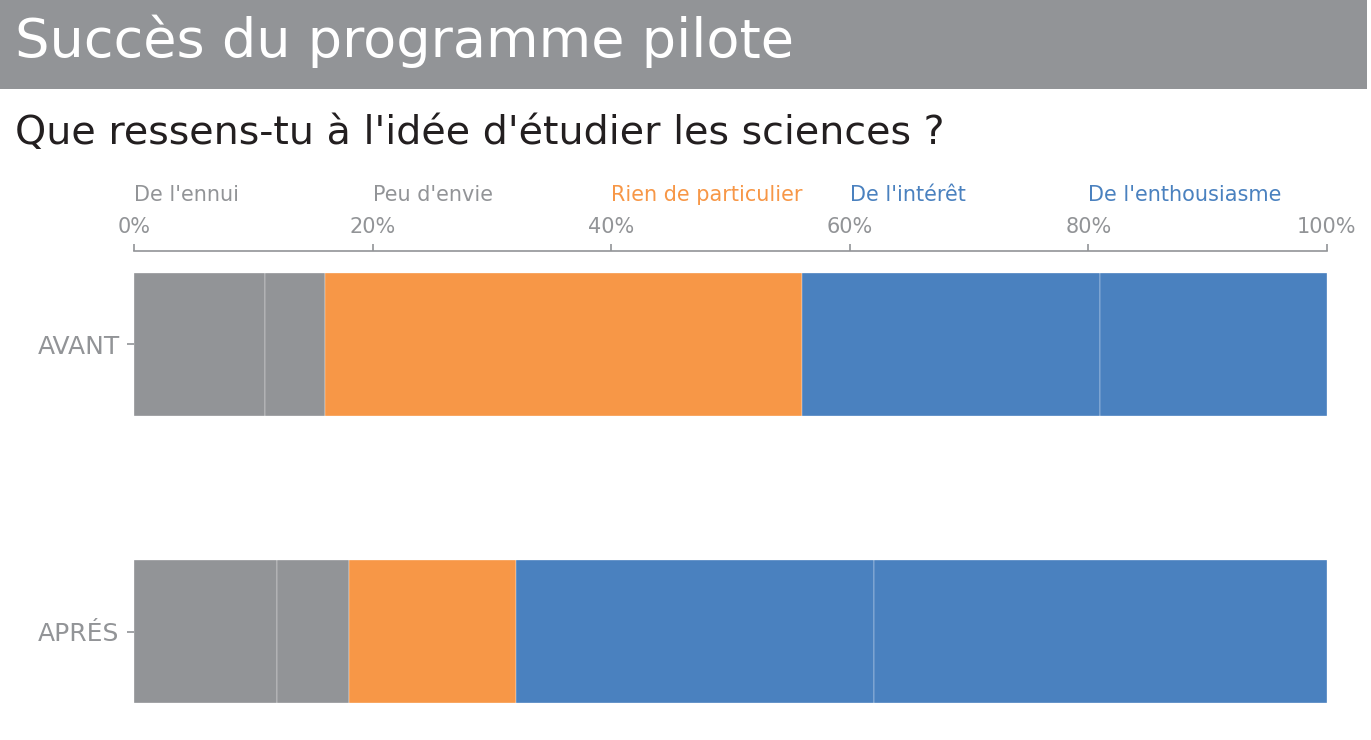

In [110]:
# responses
D = np.array([
    [11, 5, 40, 25, 19],
    [12, 6, 14, 30, 38]
])

colors = [
    [GRAY7]*2, 
    [GRAY7]*2, 
    [ORANGE1]*2,
    [BLUE2]*2,
    [BLUE2]*2
]

fig, ax1 = plt.subplots(figsize=(15, 4), dpi=150)
fig.subplots_adjust(left=0.155, right=0.685, top=0.89, bottom=0.1)

bottom = np.zeros(D.shape[0])
bars = []
for i in range(D.shape[1]):
    bars.append(
        plt.barh(
            [0,0.1], 
            D[:, i], 
            left=bottom, 
            color=colors[i], 
            edgecolor='white', 
            linewidth=0.15, 
            height=0.05))
    bottom += D[:, i]
    
ax1.invert_yaxis()

ax1.set_xlim([0, 100])
ax1.xaxis.tick_top()
# set properties for axes object
plt.setp(ax1,
         xticks=[0, 20, 40, 60, 80, 100],  # 5 x-ticks only 0 and 1
         xticklabels=['0%', '20%', '40%', '60%', '80%', '100%'],  # with n% labels
         yticks=[0,0.1],  # tick for all response
         yticklabels=['AVANT', 'APRÉS'])  # with text labels
ax1.spines['top'].set_color(GRAY7)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
# configure x tick label appearance
for item in ax1.get_xticklabels():
    item.set_color(GRAY7)
# configure y tick label appearance
for item in ax1.get_yticklabels():
    item.set_fontsize(12)
    item.set_color(GRAY7)
ax1.tick_params(color=GRAY7)

# titile the plot
plt.text(-10, -0.1,
         'Succès du programme pilote' + ' ' * 32,
         fontsize=26,
         color='white',
         # put a rectangular box around the text to set a background color
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border
plt.text(-10, -0.07, 'Que ressens-tu à l\'idée d\'étudier les sciences ?', fontsize=19, 
         color=GRAY1)

ax1.text(0, -0.05, 'De l\'ennui', color=GRAY7)
ax1.text(20, -0.05, 'Peu d\'envie', color=GRAY7)
ax1.text(40, -0.05, 'Rien de particulier', color=ORANGE1)
ax1.text(60, -0.05, 'De l\'intérêt', color=BLUE2)
ax1.text(80, -0.05, 'De l\'enthousiasme', color=BLUE2)

#from matplotlib.pyplot import Rectangle
# Tracé
#plt.barh(X, [Y(1),Z(1)], height=0.65, color = "#3ED8C9")
#plt.barh(x, Z, height=0.65, left = Y, color = "#EDFF91")
#plt.xticks(range(len(y1)), ['A', 'B', 'C', 'D']) ; 
plt.show()

# Alternative 4. Graphique en pente

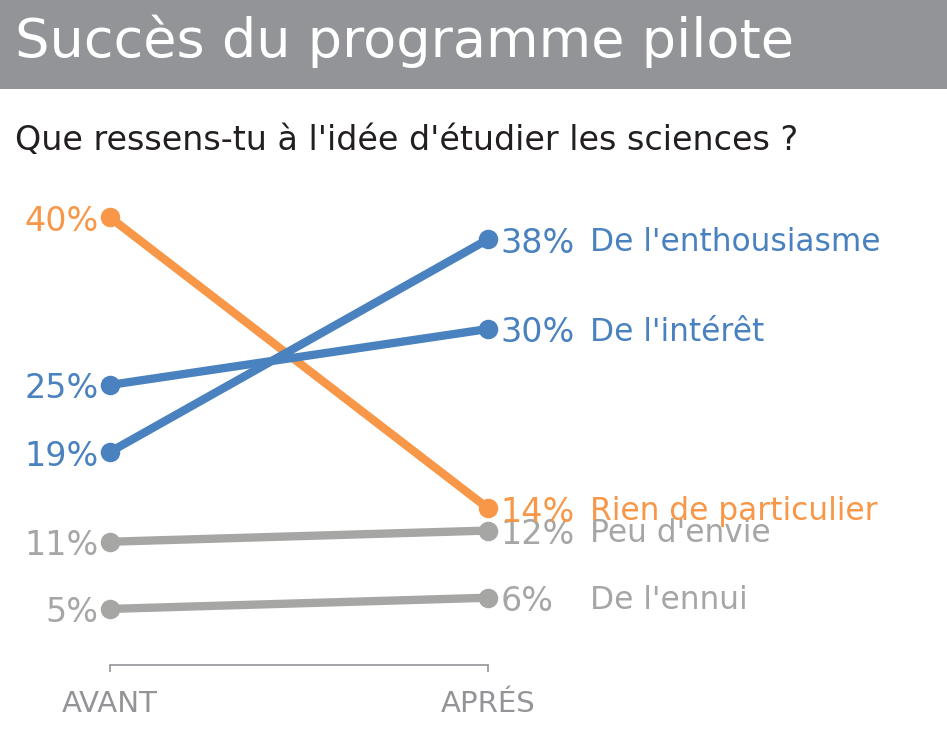

In [148]:
# survey responses
X = ['Peu d\'envie', 'De l\'ennui', 'Rien de particulier', 'De l\'intérêt', 'De l\'enthousiasme']
Y = [11, 5, 40, 25, 19]
Z = [12, 6, 14, 30, 38]

fig, ax1 = plt.subplots(figsize=(7.6, 5.5), dpi=150)
plt.subplots_adjust(left=0.065, right=0.43, top=0.76, bottom=0.19)

ax2 = ax1.twinx()
ax2.set_ylim([0, 42])
ax1.set_ylim([0, 42])
C = [GRAY8, GRAY8, ORANGE1, BLUE2, BLUE2]
for i in range(5):
    ax1.scatter([0, 1], [Y[i], Z[i]], color=C[i], s=70)
    ax1.plot([0, 1], [Y[i], Z[i]], color=C[i], linewidth=4)
    plt.text(1.27,
             Z[i] - 1,
             X[i],
             fontsize=15,
             linespacing=1.5,
             color=C[i])

ax1.tick_params(left=False)
ax2.tick_params(right=False)
plt.setp(ax1,
         xticks=[0, 1],
         xticklabels=['AVANT', 'APRÉS'],
         yticks=Y,
         yticklabels=[str(v) + '%' for v in Y])

plt.setp(ax2,
         yticks=Z,
         yticklabels=[str(v) + '%' for v in Z])

for ax in (ax1, ax2):
    for spine in ax.spines.values():
        spine.set_visible(False)

for ax, xshift in ((ax1, 0.15), (ax2, -0.14)):
    for i, item in enumerate(ax.get_yticklabels()):
        item.set_fontsize(16)
        item.set_color(C[i])
        offset = transforms.ScaledTranslation(xshift, 0, fig.dpi_scale_trans)
        item.set_transform(item.get_transform() + offset)

for item in ax1.get_xticklabels():
    item.set_fontsize(14)
    item.set_color(GRAY7)
    offset = transforms.ScaledTranslation(0, -0.07, fig.dpi_scale_trans)
    item.set_transform(item.get_transform() + offset)

ax1.tick_params(axis='x', colors=GRAY7)
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_bounds(0, 1)
ax1.spines['bottom'].set_color(GRAY7)

plt.text(-0.25, 54.3,
         'Succès du programme pilote'+ ' ' * 8,
         fontsize=26,
         color='white',
         bbox={'facecolor': GRAY7,  # background color
               'pad': 10,  # add more padding
               'edgecolor': 'none'})  # no border

plt.text(-0.25, 46, 'Que ressens-tu à l\'idée d\'étudier les sciences ?', fontsize=16, 
         color=GRAY1)

plt.show()